In [1]:
# import packages

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
%matplotlib inline

from operator import attrgetter
from datetime import timedelta

In [2]:
#     Tasks
#
# Q1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов)
#
# Q2. Сколько заказов в месяц в среднем не доставляется по разным причинам
#     (вывести детализацию по причинам)? (5 баллов)
#
# Q3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)
#
# Q4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?
#    Не стоит забывать, что внутри месяца может быть не целое количество недель.
#    Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов)
#
# Q5. Используя pandas, проведи когортный анализ пользователей.
#     В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.
#     Описание подхода можно найти link. (10 баллов)
# link: https://vc.ru/s/productstar/134090-chto-takoe-kogortnyy-analiz
#
# Q6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации.
#     Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.
#     В кластеризации можешь выбрать следующие метрики:
#     R - время от последней покупки пользователя до текущей даты,
#     F - суммарное количество покупок у пользователя за всё время,
#     M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры.
#     Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации 
#     этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) 
#     имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, 
#     monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти link. (35 баллов)
# link: https://guillaume-martin.github.io/rfm-segmentation-with-python.html

# Для решения задачи проведи предварительное исследование данных и сформулируй, 
# что должно считаться покупкой. Обосновать свой выбор ты можешь с помощью фактов оплат, 
# статусов заказов и других имеющихся данных.


# Файлы:

#  olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей
# customer_id — позаказный идентификатор пользователя
# customer_unique_id — уникальный идентификатор пользователя  (аналог номера паспорта)
# customer_zip_code_prefix — почтовый индекс пользователя
# customer_city — город доставки пользователя
# customer_state — штат доставки пользователя

#  olist_orders_dataset.csv — таблица заказов
# order_id — уникальный идентификатор заказа (номер чека)
# customer_id — позаказный идентификатор пользователя
# order_status — статус заказа
# order_purchase_timestamp — время создания заказа
# order_approved_at — время подтверждения оплаты заказа
# order_delivered_carrier_date — время передачи заказа в логистическую службу
# order_delivered_customer_date — время доставки заказа
# order_estimated_delivery_date — обещанная дата доставки

#  olist_order_items_dataset.csv — товарные позиции, входящие в заказы
# order_id — уникальный идентификатор заказа (номер чека)
# order_item_id — идентификатор товара внутри одного заказа
# product_id — ид товара (аналог штрихкода)
# seller_id — ид производителя товара
# shipping_limit_date — максимальная дата доставки продавцом для передачи заказа партнеру по логистике
# price — цена за единицу товара
# freight_value — вес товара

# Пример структуры данных можно визуализировать по order_id == 00143d0f86d6fbd9f9b38ab440ac16f5
# Уникальные статусы заказов в таблице olist_orders_dataset:

# created — создан
# approved — подтверждён
# invoiced — выставлен счёт
# processing — в процессе сборки заказа
# shipped — отгружен со склада
# delivered — доставлен пользователю
# unavailable — недоступен
# canceled — отменён

In [2]:
# reading csv files

# unique identification customers
# file: olist_customers_dataset.csv
df_customers = pd.read_csv(f'C:/Users/Nikolyai/Desktop/Karpov Course/intermediate_project_e-commerce/olist_customers_dataset.csv')

# orders dataset
# file: olist_orders_dataset.csv
df_orders = pd.read_csv(f'C:/Users/Nikolyai/Desktop/Karpov Course/intermediate_project_e-commerce/olist_orders_dataset.csv')

# items included in orders
# file: olist_order_items_dataset.csv
df_order_items = pd.read_csv(f'C:/Users/Nikolyai/Desktop/Karpov Course/intermediate_project_e-commerce/olist_order_items_dataset.csv')

In [ ]:
# Checking and cleaning Data
#
# 1. проверка на пустые значения. Метод isnull().sum()
# 2. проверка на тип данных. Метод info()
# 3. проверка на дубли, выбросы и аномальные значения. Метод describe()
#
# https://proglib.io/p/moem-dataset-rukovodstvo-po-ochistke-dannyh-v-python-2020-03-27
# https://towardsdatascience.com/simplify-your-dataset-cleaning-with-pandas-75951b23568e

In [81]:
# Checking and cleaning Data

# 1. проверка на пустые значения
# смотрим пустые ячейки во всех трех файлах

print('df_customers dataset')
print(df_customers.isnull().sum())
print('')
print('df_orders dataset')
print(df_orders.isnull().sum())
print('')
print('df_order_items dataset')
print(df_order_items.isnull().sum())

# в датафрейме df_orders обнаружились пустые ячейки, поэтому: 
# 1.1 нужно посмотреть процент от общего числа строк
# 1.2 причины их возникновения

df_customers dataset
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

df_orders dataset
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

df_order_items dataset
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [82]:
# Checking and cleaning Data

# 1.1 проверка на пустые значения
# Процентный список пропущенных данных в датафрейме df_orders
for col in df_orders.columns:
    pct_missing = np.mean(df_orders[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
# процент пропущенных значений небольшой,
# в частности, order_approved_at меньше одного процента
# Вывод: процент небольшой, нужно разобраться в возникновении причин

order_id - 0%
customer_id - 0%
order_status - 0%
order_purchase_timestamp - 0%
order_approved_at - 0%
order_delivered_carrier_date - 2%
order_delivered_customer_date - 3%
order_estimated_delivery_date - 0%


In [83]:
# Checking and cleaning Data

# 1.2 причины их возникноввения
# создадим датафрейм со строками, которые имееют пустые значения
df_orders_isna = df_orders[df_orders.isna().any(axis=1)]
df_orders_isna

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [85]:
# Checking and cleaning Data

# 1.2 причины их возникноввения

# наименование столбцов и их значение
#
# order_approved_at - время подтверждения оплаты заказа
# order_delivered_carrier_date - время передачи заказа в логистическую службу
# order_delivered_customer_date - время доставки заказа


# группируем датафрейм по статусу заказа order_status, столбец order_approved_at
df_orders_isna_order_approved_at = df_orders_isna \
    .query('order_approved_at != order_approved_at') \
    .groupby('order_status') \
    .agg({'customer_id': 'count'}) \
    .rename(columns={'customer_id': 'amount'}) \
    .sort_values('amount', ascending=False) \
    .reset_index()

# группируем датафрейм по статусу заказа order_status, столбец order_delivered_carrier_date
df_orders_isna_order_delivered_carrier_date = df_orders_isna \
    .query('order_delivered_carrier_date != order_delivered_carrier_date') \
    .groupby('order_status') \
    .agg({'customer_id': 'count'}) \
    .rename(columns={'customer_id': 'amount'}) \
    .sort_values('amount', ascending=False) \
    .reset_index()

# группируем датафрейм по статусу заказа order_status, столбец order_delivered_customer_date
df_orders_isna_order_delivered_customer_date = df_orders_isna \
    .query('order_delivered_customer_date != order_delivered_customer_date') \
    .groupby('order_status') \
    .agg({'customer_id': 'count'}) \
    .rename(columns={'customer_id': 'amount'}) \
    .sort_values('amount', ascending=False) \
    .reset_index()

print('время подтверждения оплаты заказа')
print('')
print(df_orders_isna_order_approved_at)
print('')
print('')
print('время передачи заказа в логистическую службу')
print('')
print(df_orders_isna_order_delivered_carrier_date)
print('')
print('')
print('время доставки заказа')
print('')
print(df_orders_isna_order_delivered_customer_date)
print('')

# из выведенных данных можно понять, что 
# у столбца со временем подтверждения оплаты заказа есть вопросы по 14 позициям delivered. С остальным ОК
# у столбца со временем передачи заказа есть вопросы по 2 позициям delivered. С остальным ОК
# у столбца со временем подтверждения оплаты заказа есть вопросы по 8 позициям delivered. С остальным ОК
#
# Вывод: с данными практически везде все в порядке.
#        Позиции со статусом delivered необходимо отправить в отдел поддержки для выяснения причин.

время подтверждения оплаты заказа

  order_status  amount
0     canceled     141
1    delivered      14
2      created       5


время передачи заказа в логистическую службу

  order_status  amount
0  unavailable     609
1     canceled     550
2     invoiced     314
3   processing     301
4      created       5
5     approved       2
6    delivered       2


время доставки заказа

  order_status  amount
0      shipped    1107
1     canceled     619
2  unavailable     609
3     invoiced     314
4   processing     301
5    delivered       8
6      created       5
7     approved       2



In [86]:
# Checking and cleaning Data
# 2. проверка на тип данных

print('df_customers dataset')
print(df_customers.info())
print('')
print('df_orders dataset')
print(df_orders.info())
print('')
print('df_order_items dataset')
print(df_order_items.info())

# Вывод: необходимо в дальнейшем изменить тип данных у тех столбцов, где есть даты

df_customers dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

df_orders dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purch

In [87]:
# Checking and cleaning Data
# 3. проверка на дубли, выбросы и аномальные значения

print('df_customers dataset')
print(df_customers.describe())
print(df_customers.shape)
print('')
print('')
print('')
print('df_orders dataset')
print(df_orders.describe())
print(df_orders.shape)
print('')
print('')
print('')
print('df_order_items dataset')
print(df_order_items.describe())
print(df_order_items.shape)

# Вывод: дублирующих и аномальных значений не обнаружено

df_customers dataset
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000
(99441, 5)



df_orders dataset
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:3

In [387]:
# Q1. Сколько у нас пользователей, которые совершили покупку только один раз?
#
# step 1: таблицу с заказами мерджим к ней таблицу с уникальными идентификаторами пользователей по customer_id
# step 2: фильтруем по статусу заказа, берем только delivered
# step 3: группируем по customer_unique_id и считаем count по любому столбцу
#
# Вопрос: почему определяем заказы в месяц как по дате создания заказа, а не другим полям?
# Ответ: по всем столбцам времени есть незаполненные данные, кроме обещанной даты доставки
#
# Вопрос: почему определяем совершенную покупку только при статусе заказа delivered ? 
# Ответ: все статусы за исключением canceled находятся в процессе. 
#        Здесь мы считаем, что статус delivered является также и фактом оплаты и небольшой
#        вероятности возврата товара.

# мерджим таблицу с заказами и пользователей
df_orders_custumoers_merged = pd.merge(df_orders, df_customers, how='left', on='customer_id')

# группируем уникальные пользователей
df_orders_custumoers_delivered = df_orders_custumoers_merged \
    .query('order_status == "delivered"') \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_id': 'amount'})

# количество пользователей совершивших одну покупку
df_orders_custumoers_delivered = df_orders_custumoers_delivered[df_orders_custumoers_delivered.amount == 1]

# процент пользователей совершивших одну покупку
full_percent = round(df_orders_custumoers_delivered.shape[0] / df_orders_custumoers_merged.shape[0] * 100, 1)

print(df_orders_custumoers_delivered.shape[0], 'пользователей совершили только одну покупку')
print('или')
print(full_percent, '% пользователей совершили только одну покупку')

90557 пользователей совершили только одну покупку
или
91.1 % пользователей совершили только одну покупку


In [90]:
# Q2. Сколько заказов в месяц в среднем не доставляется 
#     по разным причинам (вывести детализацию по причинам)?
#
# step 1: таблицу с заказами мерджим к ней таблицу с уникальными идентификаторами пользователей по customer_id
# step 2: меняем формат даты создания заказа order_purchase_timestamp на формат YYYY-MM
# step 3: фильтруем по статусу заказа, берем все кроме delivered
# step 4: группируем по месяцам и берем среднее по каждой причине
#
# Вопрос: почему определяем заказы в месяц как по дате создания заказа, а не другим полям?
# Ответ: по всем столбцам времени есть незаполненные данные, кроме обещанной даты доставки
#        поэтому определяем столбец с датой - order_purchase_timestamp
# Вопрос: почему определяем не доставленный товар при всех статусах кроме delivered ? 
# Ответ: Логика ответа только при статусе delivered, но наоборот. 
#        Если клиент товар не получил и не оплатил, то это незавершенная покупка

# соединяем таблицы с заказами и пользователями 
df_ord_cust_merged = pd.merge(df_orders, df_customers, how='left', on='customer_id')

# меняем тип данных на дату
df_ord_cust_merged['order_purchase_timestamp'] = pd.to_datetime(df_ord_cust_merged.order_purchase_timestamp, format= '%Y-%m')
df_ord_cust_merged['order_purchase_timestamp'] = df_ord_cust_merged['order_purchase_timestamp'].dt.strftime('%Y-%m')

# группируем все данные, но не доставленные
df_months_orders = df_ord_cust_merged \
    .query('order_status != "delivered"') \
    .groupby(['order_purchase_timestamp', 'order_status'], as_index=False) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_id': 'amount'}) \
    .sort_values('order_purchase_timestamp')

print(df_months_orders)
print('')
print(round(df_months_orders.amount.mean(), 1), '- товара в среднем в месяц не доставляется клиентам')

    order_purchase_timestamp order_status  amount
0                    2016-09     canceled       2
1                    2016-09      shipped       1
2                    2016-10     canceled      24
3                    2016-10     invoiced      18
4                    2016-10   processing       2
..                       ...          ...     ...
108                  2018-08      shipped      47
109                  2018-08  unavailable       7
110                  2018-09     canceled      15
111                  2018-09      shipped       1
112                  2018-10     canceled       4

[113 rows x 3 columns]

26.2 - товара в среднем в месяц не доставляется клиентам


In [8]:
# Q3. По каждому товару определить, в какой день недели товар чаще всего покупается
#
# step 1: таблицу с заказами мерджим к ней таблицу с товарными позициями по order_id
# step 2: меняем формат даты создания заказа order_purchase_timestamp на формат дня недели
# step 3: делаем pivot, то есть дни недели выводим в столбец
# step 4: находим максимум по каждому дню недели
#
# Вопрос: почему определяем заказы в месяц как по дате создания заказа, а не другим полям?
# Ответ: по всем столбцам времени есть незаполненные данные, кроме обещанной даты доставки
#        поэтому определяем столбец с датой - order_purchase_timestamp

# мерджим заказы и инофрмацию по заказам
df_ord_items_merged = pd.merge(df_orders, df_order_items, how='left', on='order_id')

# меняем тип данных у даты
df_ord_items_merged['order_purchase_timestamp'] = pd.to_datetime(df_ord_items_merged['order_purchase_timestamp'])
df_ord_items_merged['weekday'] = df_ord_items_merged['order_purchase_timestamp'].dt.day_name()

# группируем по товару и дню недели
purchase_frequency_weekday = df_ord_items_merged \
    .query('order_status == "delivered"') \
    .groupby(['product_id', 'weekday'], as_index=False) \
    .agg({'customer_id': 'count'}) \
    .rename(columns={'customer_id': 'amount'}) \
    .pivot(index='product_id', columns='weekday', values='amount') \
    .fillna(0) \
    .sort_values(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                ascending=[False, False, False, False, False, False, False]) \
    .reset_index()

purchase_frequency_weekday = purchase_frequency_weekday [['product_id',
                                                          'Monday',
                                                          'Tuesday',
                                                          'Wednesday',
                                                          'Thursday',
                                                          'Friday',
                                                          'Saturday',
                                                          'Sunday']]


purchase_frequency_weekday

weekday,product_id,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,99a4788cb24856965c36a24e339b6058,91.0,59.0,63.0,70.0,74.0,59.0,61.0
1,aca2eb7d00ea1a7b8ebd4e68314663af,78.0,85.0,72.0,89.0,83.0,59.0,54.0
2,422879e10f46682990de24d770e7f83d,64.0,67.0,93.0,79.0,77.0,57.0,47.0
3,389d119b48cf3043d311335e499d9c6b,62.0,54.0,52.0,67.0,56.0,53.0,46.0
4,d1c427060a0f73f6b889a5c7c61f2ac4,62.0,53.0,57.0,40.0,42.0,44.0,34.0
...,...,...,...,...,...,...,...,...
32211,ff6a816ae8a01312fe42dc48c7c8ead1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32212,ff90ba6020fbb7d7f56613e213e9dc57,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32213,ffbfe460c6f140cdbe4f494be6dd43be,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32214,ffc88104d219c1b767d566fd93653dd2,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
print('TOP 5 purchase frequency on weekdays')
print('')
print('Monday')
print(purchase_frequency_weekday.sort_values('Monday', ascending=False).iloc[0:5, [0,1]])
print('')
print('Tuesday')
print(purchase_frequency_weekday.sort_values('Tuesday', ascending=False).iloc[0:5, [0,2]])
print('')
print('Wednesday')
print(purchase_frequency_weekday.sort_values('Wednesday', ascending=False).iloc[0:5, [0,3]])
print('')
print('Thursday')
print(purchase_frequency_weekday.sort_values('Thursday', ascending=False).iloc[0:5, [0,4]])
print('')
print('Friday')
print(purchase_frequency_weekday.sort_values('Friday', ascending=False).iloc[0:5, [0,5]])
print('')
print('Saturday')
print(purchase_frequency_weekday.sort_values('Saturday', ascending=False).iloc[0:5, [0,6]])
print('')
print('Sunday')
print(purchase_frequency_weekday.sort_values('Sunday', ascending=False).iloc[0:5, [0,7]])

TOP 5 purchase frequency on weekdays

Monday
weekday                        product_id  Monday
0        99a4788cb24856965c36a24e339b6058    91.0
1        aca2eb7d00ea1a7b8ebd4e68314663af    78.0
2        422879e10f46682990de24d770e7f83d    64.0
3        389d119b48cf3043d311335e499d9c6b    62.0
4        d1c427060a0f73f6b889a5c7c61f2ac4    62.0

Tuesday
weekday                        product_id  Tuesday
1        aca2eb7d00ea1a7b8ebd4e68314663af     85.0
6        53b36df67ebb7c41585e8d54d6772e08     76.0
2        422879e10f46682990de24d770e7f83d     67.0
7        368c6c730842d78016ad823897a372db     63.0
5        53759a2ecddad2bb87a079a1f1519f73     62.0

Wednesday
weekday                        product_id  Wednesday
2        422879e10f46682990de24d770e7f83d       93.0
1        aca2eb7d00ea1a7b8ebd4e68314663af       72.0
5        53759a2ecddad2bb87a079a1f1519f73       66.0
0        99a4788cb24856965c36a24e339b6058       63.0
4        d1c427060a0f73f6b889a5c7c61f2ac4       57.0

Thursday
w

In [10]:
# Q4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
#     Не стоит забывать, что внутри месяца может быть не целое количество недель. 
#     Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

# соединяем три датафрейма в один
df_merge_ord_cst = pd.merge(df_orders, df_customers, how='left', on='customer_id')
df_full_merge = pd.merge(df_merge_ord_cst, df_order_items, how='left', on='order_id')

# меняем тип данных на дату
df_full_merge['order_purchase_timestamp'] = pd.to_datetime(df_full_merge.order_purchase_timestamp)
df_full_merge['date'] = df_full_merge['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')
df_full_merge['month'] = df_full_merge['order_purchase_timestamp'].dt.strftime('%Y-%m')

# группируем только доставленные заказы
df_months_orders = df_full_merge \
    .query('order_status == "delivered"') \
    .groupby(['customer_unique_id', 'date', 'month'], as_index=False) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_id': 'amount_of_purchase'}) \
    .sort_values('customer_unique_id')

# меняем тип данных у даты
df_months_orders['date'] = pd.to_datetime(df_months_orders['date'])
df_months_orders['month'] = pd.to_datetime(df_months_orders['month'], format='%Y-%m')

# Делаем подсчет дней в месяце
df_months_orders['days_in_month'] = df_months_orders['date'].dt.days_in_month
# рассчитываем коэффициент для недели
df_months_orders['coefficient_of_week'] = round(df_months_orders['days_in_month'] / 7, 2)

# расчет средних покупок в неделю
df_months_orders['mean_purchase'] = round(df_months_orders['amount_of_purchase'] / df_months_orders['coefficient_of_week'], 2)

df_months_orders

# Выводы: в большиенсте случаев товар покупался один раз, поэтому среднее значение покупок в неделю маленькое

,customer_unique_id,date,month,amount_of_purchase,days_in_month,coefficient_of_week,mean_purchase
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,2018-05-01,1,31,4.43,0.23
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,2018-05-01,1,31,4.43,0.23
2,0000f46a3911fa3c0805444483337064,2017-03-10,2017-03-01,1,31,4.43,0.23
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,2017-10-01,1,31,4.43,0.23
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,2017-11-01,1,30,4.29,0.23
...,...,...,...,...,...,...,...
95583,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,2017-06-01,2,30,4.29,0.47
95584,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,2017-12-01,1,31,4.43,0.23
95585,ffff371b4d645b6ecea244b27531430a,2017-02-07,2017-02-01,1,28,4.00,0.25
95586,ffff5962728ec6157033ef9805bacc48,2018-05-02,2018-05-01,1,31,4.43,0.23


In [327]:
# Q5. Используя pandas, проведи когортный анализ пользователей.
#     В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.
#     Описание подхода можно найти тут:
#     https://vc.ru/s/productstar/134090-chto-takoe-kogortnyy-analiz

df_full_merged = pd.merge(df_customers, df_orders, how='inner', on='customer_id')
df_full_merged['order_purchase_timestamp'] = pd.to_datetime(df_full_merged['order_purchase_timestamp'], format='%Y-%m-%d')
df_full_merged['month'] = df_full_merged['order_purchase_timestamp'].dt.to_period('M')
df_full_merged['year'] = df_full_merged['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y')) 

# смотрим на весь датафрейм в разреме 2017 года
df_full_merged.groupby(['month'])['customer_unique_id'].agg({'count', 'nunique'})

,count,nunique
month,,
2016-09,4,4
2016-10,324,324
2016-12,1,1
2017-01,800,800
2017-02,1780,1779
2017-03,2682,2681
2017-04,2404,2402
2017-05,3700,3695
2017-06,3245,3241


In [439]:
# количество уникальных пользователей
df_full_merged['customer_unique_id'].nunique()
df_full_merged

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-17 15:48:44,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2017-05-08 16:31:38,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2017,2017-05
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2017-09-16 12:30:24,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2017,2017-09
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2017-10-02 00:28:03,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2017,2017-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-04-29 23:53:46,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018,2018-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-02 12:04:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,2018,2018-04
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2017-11-27 18:30:23,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,2017,2017-11
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2017-11-19 17:51:15,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,2017,2017-11
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2018-02-07 03:29:42,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,2018,2018-02


In [282]:
# берем только 2017 год
df_full_merged['year'] = df_full_merged['year'].astype(str).astype(int)
df_full_merged_2017_cohort = df_full_merged.query('year == 2017')

# создаем когорту за 2017 год
df_full_merged_2017_cohort['cohort'] = df_full_merged_2017_cohort \
                                    .groupby('customer_unique_id')['order_purchase_timestamp'] \
                                    .transform('min') \
                                    .dt.to_period('M')

df_full_merged_2017_cohort

C:\Users\Nikolyai\AppData\Local\Temp/ipykernel_13916/2631222469.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_merged_2017_cohort['cohort'] = df_full_merged_2017_cohort \


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,year,cohort
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05,2017,2017-05
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04 00:00:00,2017-09,2017,2017-09
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08 00:00:00,2017-11,2017,2017-11
10,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,39400,montes claros,MG,8428e578bb1cf839ae26a6b7615502b9,delivered,2017-11-27 17:23:20,2017-11-27 18:01:20,2017-11-28 23:04:41,2017-12-08 22:16:17,2017-12-20 00:00:00,2017-11,2017,2017-11
12,b2d1536598b73a9abd18e0d75d92f0a3,918dc87cd72cd9f6ed4bd442ed785235,18682,lencois paulista,SP,83d8f70418eefd96f37b483dff430305,delivered,2017-09-09 09:54:57,2017-09-09 10:10:17,2017-09-12 12:42:43,2017-09-20 20:23:34,2017-10-02 00:00:00,2017-09,2017,2017-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99430,27b9b32173455ef32167540451749d0b,277490f0d435b602fe4475d4b89e9181,6727,cotia,SP,326c29ec5b89834b17aea7d85302fd70,delivered,2017-05-24 11:54:31,2017-05-25 02:50:25,2017-05-26 16:12:26,2017-06-02 14:12:38,2017-06-14 00:00:00,2017-05,2017,2017-05
99433,14308d2303a3e2bdf4939b86c46d2679,e7f8760e2bbd2f1986bebd99596c088e,66033,belem,PA,ec3a75fb0ac595e461765d2d854b1d08,delivered,2017-03-15 21:04:08,2017-03-15 21:04:08,2017-03-20 08:34:12,2017-04-05 11:07:12,2017-04-26 00:00:00,2017-03,2017,2017-03
99435,7fe2e80252a9ea476f950ae8f85b0f8f,4b5820135d360a45552b5163835b1d89,35500,divinopolis,MG,c9aea907527f5d4f5fb44955c18a79fb,delivered,2017-12-17 23:13:41,2017-12-18 00:17:27,2017-12-20 18:52:08,2018-01-04 13:08:05,2018-01-23 00:00:00,2017-12,2017,2017-12
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,2017-11,2017,2017-11


In [315]:
# Группируем данные по когорте и месяцу, и считаем количество уникальных клиентов
# И считаем период, между месяцем, в который был совершен заказ с когортой

cohort_df = df_full_merged_2017_cohort \
    .groupby(['cohort', 'month'], as_index=False) \
    .agg(users=('customer_unique_id', 'nunique'))

cohort_df['lifetime'] = (cohort_df['month'] - cohort_df['cohort']).apply(attrgetter('n'))
cohort_df

# допольнительная информация по оператору attrgetter('n')
# https://stackoverflow.com/questions/54465030/monthend-object-result-in-11-monthends-instead-of-number/54465409#54465409

,cohort,month,users,lifetime
0,2017-01,2017-01,765,0
1,2017-01,2017-02,3,1
2,2017-01,2017-03,2,2
3,2017-01,2017-04,1,3
4,2017-01,2017-05,3,4
...,...,...,...,...
72,2017-10,2017-11,31,1
73,2017-10,2017-12,11,2
74,2017-11,2017-11,7305,0
75,2017-11,2017-12,40,1


In [316]:
# создаем сводную таблицу для когорты

cohort_pivot = cohort_df.pivot_table(index='cohort',
                                     columns='lifetime',
                                     values='users')
cohort_pivot

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-01,765.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,3.0,1.0
2017-02,1752.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0,NaN
2017-03,2636.0,13.0,10.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,NaN,NaN
2017-04,2353.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,NaN,NaN,NaN
2017-05,3596.0,18.0,18.0,14.0,11.0,12.0,15.0,6.0,NaN,NaN,NaN,NaN
2017-06,3139.0,15.0,11.0,13.0,8.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN
2017-07,3895.0,20.0,14.0,10.0,11.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,4184.0,29.0,14.0,11.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4131.0,28.0,22.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [388]:
# делим значения каждой строки на первое значение строки

cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
retention_matrix

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-01,1.0,0.003922,0.002614,0.001307,0.003922,0.001307,0.005229,0.001307,0.001307,NaN,0.003922,0.001307
2017-02,1.0,0.002283,0.002854,0.001142,0.003995,0.001142,0.002283,0.001712,0.001712,0.002283,0.001142,NaN
2017-03,1.0,0.004932,0.003794,0.003794,0.003414,0.001517,0.001517,0.003035,0.003414,0.000759,NaN,NaN
2017-04,1.0,0.005950,0.002125,0.001700,0.003400,0.002550,0.003400,0.002975,0.002975,NaN,NaN,NaN
2017-05,1.0,0.005006,0.005006,0.003893,0.003059,0.003337,0.004171,0.001669,NaN,NaN,NaN,NaN
2017-06,1.0,0.004779,0.003504,0.004141,0.002549,0.003823,0.003823,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.005135,0.003594,0.002567,0.002824,0.002054,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006931,0.003346,0.002629,0.003585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006778,0.005326,0.002905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [428]:
# меняем стиль для удобного чтения
retention_matrix_style = (retention_matrix
            .style
            .set_caption('Monthly Cohorts: user retention')
            .background_gradient(cmap='PuBu')        
            .highlight_null('white')                
            .format("{:.2%}", na_rep=""))

retention_matrix_style

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-01,100.00%,0.39%,0.26%,0.13%,0.39%,0.13%,0.52%,0.13%,0.13%,,0.39%,0.13%
2017-02,100.00%,0.23%,0.29%,0.11%,0.40%,0.11%,0.23%,0.17%,0.17%,0.23%,0.11%,
2017-03,100.00%,0.49%,0.38%,0.38%,0.34%,0.15%,0.15%,0.30%,0.34%,0.08%,,
2017-04,100.00%,0.59%,0.21%,0.17%,0.34%,0.25%,0.34%,0.30%,0.30%,,,
2017-05,100.00%,0.50%,0.50%,0.39%,0.31%,0.33%,0.42%,0.17%,,,,
2017-06,100.00%,0.48%,0.35%,0.41%,0.25%,0.38%,0.38%,,,,,
2017-07,100.00%,0.51%,0.36%,0.26%,0.28%,0.21%,,,,,,
2017-08,100.00%,0.69%,0.33%,0.26%,0.36%,,,,,,,
2017-09,100.00%,0.68%,0.53%,0.29%,,,,,,,,


In [314]:
retention_matrix.iloc[:,3].idxmax()

# Вывод: когорта с самым высоким retention на третий месяц 2017-06

Period('2017-06', 'M')

In [5]:
# Q6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации.
#     Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.
#     В кластеризации можешь выбрать следующие метрики:
#     R - время от последней покупки пользователя до текущей даты,
#     F - суммарное количество покупок у пользователя за всё время,
#     M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры.
#     Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации 
#     этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) 
#     имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, 
#     monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти link. (35 баллов)
#
# link: https://guillaume-martin.github.io/rfm-segmentation-with-python.html

# Подготовка данных к RFM анализу;
# step 1: мерджим все три датафрейма
# step 2: группируем данные по уникальным пользователям
# step 3: берем у клиента последний заказ
# step 4: считаем monetary и frequency для каждого уникального клиента
# step 5: находим дату как точку отсчета
# step 6: считаем recency, т.е. сколько дней назад был сделан последний заказ
# step 7: присваиваем ранги и делим на сегменты

# берем датафрейм с заказами и мерджим к нему клиентов и информацию по заказаам
# данные берем за весь период существования компании
df_rfm_preparation = df_orders \
            .merge(df_customers, how='inner', on='customer_id') \
            .merge(df_order_items, how='inner', on='order_id')

# группируем данные по уникальным пользователям
df_rfm_preparation_grouping = df_rfm_preparation \
    .groupby(['order_id', 'order_purchase_timestamp', 'customer_unique_id'], as_index=False) \
    .agg({'price':'sum', 'order_id':'count'}) \
    .rename(columns={'price': 'monetary', 'order_id':'frequency'})

# берем у клиента последний заказ
df_rfm_preparation_grouping['last_order_date'] = df_rfm_preparation_grouping \
            .groupby(['customer_unique_id']) \
            .order_purchase_timestamp \
            .transform('max')

# считаем monetary и frequency для каждого уникального клиента
df_rfm = df_rfm_preparation_grouping \
    .groupby(['customer_unique_id', 'last_order_date'], as_index=False) \
    .agg({'monetary':'sum', 'frequency':'count' })

# для расчета количества дней до последнего заказа сделаем точку отсчета
today_date = df_rfm.last_order_date.max() + dt.timedelta(days=1)
today_date

TypeError: can only concatenate str (not "datetime.timedelta") to str

In [ ]:
# считаем сколько дней назад клиентом был сделан последний заказ
df_rfm['recency'] = df_rfm.last_order_date.apply(lambda x: (today_date - x).days)
df_rfm

In [444]:
# Присваиваем ранги:
# для recency от 1 до 4, для frequency и monetary от 1 до 3
# 1 - отличный, 4 - отвратительный


qaintiles = df_rfm[['recency', 'frequency', 'monetary']].quantile([.25, .5, .75, .90]).to_dict()
qaintiles

# recency и monetary делим на 4 сегмента
# основываемся на графиках R, F, M - hist()  и квантилям распределений

# frequency
# в связи с тем, что более 90 процентов покупок совершалось один раз (см. задание 1),
# то frequency делим на только три сегмента

{'recency': {0.25: 164.0, 0.5: 269.0, 0.75: 398.0, 0.9: 517.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0, 0.9: 1.0},
 'monetary': {0.25: 47.9, 0.5: 89.9, 0.75: 155.0, 0.9: 284.0}}

In [446]:
# recency
# чем меньше давность покупки, тем лучше
def r_score(x):
    if x <= 165:
        return 1
    elif x <= 270:
        return 2
    elif x <= 400:
        return 3
    else:
        return 4

# monetary
# чем больше денег нам принес покупатель, тем лучше
def m_score(x):
    if x <= 50:
        return 3
    elif x <= 155:
        return 2
    else:
        return 1

# frequency  
# чем чаще покупают, тем лучше
def  f_score(x):
    if x <= 1:
        return 3
    elif x <= 3:
        return 2
    else:
        return 1

In [447]:
# get ready the R, F and M scores of each customer
df_rfm['r_score'] = df_rfm['recency'].apply(lambda x: r_score(x))
df_rfm['f_score'] = df_rfm['frequency'].apply(lambda x: f_score(x))
df_rfm['m_score'] = df_rfm['monetary'].apply(lambda x: m_score(x))

# combine the R, F and M scores into a RFM Score
df_rfm['RFM'] = df_rfm['r_score'].map(str) + \
                df_rfm['f_score'].map(str) + \
                df_rfm['m_score'].map(str) 
df_rfm

,customer_unique_id,last_order_date,monetary,frequency,recency,r_score,f_score,m_score,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-01-13 00:23:16,129.90,1,278,3,3,2,332
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2017-08-09 22:30:26,18.90,1,434,4,3,3,433
2,0000f46a3911fa3c0805444483337064,2017-10-16 22:09:01,69.00,1,366,3,3,2,332
3,0000f6ccb0745a6a4b88665a16c9f078,2017-01-05 14:18:03,25.99,1,651,4,3,3,433
4,0004aac84e0df4da2b147fca70cf8255,2017-05-03 13:35:57,180.00,1,533,4,3,1,431
...,...,...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,2018-06-11 10:21:51,1570.00,1,129,1,3,1,131
95416,fffea47cd6d3cc0a88bd621562a9d061,2018-08-16 12:18:45,64.89,1,63,1,3,2,132
95417,ffff371b4d645b6ecea244b27531430a,2018-03-11 11:11:51,89.90,1,221,2,3,2,232
95418,ffff5962728ec6157033ef9805bacc48,2018-06-11 14:58:57,115.00,1,129,1,3,2,132


In [448]:
# предварительно смотрим распределение сегментов

# группируем данные по метрикам 
pivots = df_rfm.groupby(['r_score', 'f_score', 'm_score']).agg(uniq_customers=('customer_unique_id', 'count'))

# делаем сводную таблицу
pivots_rfm = pd.pivot_table(pivots, 
                           index=['r_score', 'f_score'], 
                           columns='m_score', 
                           values='uniq_customers')

pivots_rfm

m_score               1        2       3
r_score f_score                         
1       1          33.0      2.0     1.0
        2         789.0    447.0    62.0
        3        5484.0  10632.0  6734.0
2       1          10.0      NaN     NaN
        2         517.0    346.0    33.0
        3        5425.0  10650.0  6990.0
3       1           2.0      NaN     NaN
        2         288.0    188.0    28.0
        3        5683.0  10708.0  6999.0
4       2          95.0     62.0    10.0
        3        5510.0  10716.0  6976.0

In [450]:
# определяем сегменты

# 1 сегмент: чемпионы: покупают часто, много и приносят много денег
# 2 сегмент: новенькие: купили недавно и совсем немного
# 3 сегмент: лояльные: группа людей, которые постоянно покупает и оставляет средний чек.
# 4 сегмент: рискованные: есть вероятность их потерять, поэтому им необоходимо выслать купоны/скидки/акции
# 5 сегмент: возвращаем: есть возможность/попытка вернуть покупателя. Им необоходимо предложить бонус на новую покупку
# 6 сегмент: потерянные: покупатели, которые купили давно и мало

# делаем сегменты
segt_map = {
    r'11': 'чемпионы',
    r'1[2-3]': 'новенькие',
    r'[2-3][1-2]': 'лояльные',
    r'[2-3]3': 'рискованные',
    r'41': 'возвращаем',
    r'4[2-3]': 'потерянные'
}

# сегменты приклеиваем к датафрейму rfm
df_rfm['segment'] = df_rfm['r_score'].map(str) + df_rfm['m_score'].map(str)
df_rfm['segment'] = df_rfm['segment'].replace(segt_map, regex=True)
df_rfm

,customer_unique_id,last_order_date,monetary,frequency,recency,r_score,f_score,m_score,RFM,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-01-13 00:23:16,129.90,1,278,3,3,2,332,лояльные
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2017-08-09 22:30:26,18.90,1,434,4,3,3,433,потерянные
2,0000f46a3911fa3c0805444483337064,2017-10-16 22:09:01,69.00,1,366,3,3,2,332,лояльные
3,0000f6ccb0745a6a4b88665a16c9f078,2017-01-05 14:18:03,25.99,1,651,4,3,3,433,потерянные
4,0004aac84e0df4da2b147fca70cf8255,2017-05-03 13:35:57,180.00,1,533,4,3,1,431,возвращаем
...,...,...,...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,2018-06-11 10:21:51,1570.00,1,129,1,3,1,131,чемпионы
95416,fffea47cd6d3cc0a88bd621562a9d061,2018-08-16 12:18:45,64.89,1,63,1,3,2,132,новенькие
95417,ffff371b4d645b6ecea244b27531430a,2018-03-11 11:11:51,89.90,1,221,2,3,2,232,лояльные
95418,ffff5962728ec6157033ef9805bacc48,2018-06-11 14:58:57,115.00,1,129,1,3,2,132,новенькие


In [451]:
# группируем по сегменту
df_rfm = df_rfm \
    .groupby('segment', as_index=False) \
    .agg({'customer_unique_id': 'count'})

df_rfm

,segment,customer_unique_id
0,возвращаем,5605
1,лояльные,33817
2,новенькие,17878
3,потерянные,17764
4,рискованные,14050
5,чемпионы,6306


C:\Users\Nikolyai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='segment', ylabel='customer_unique_id'>

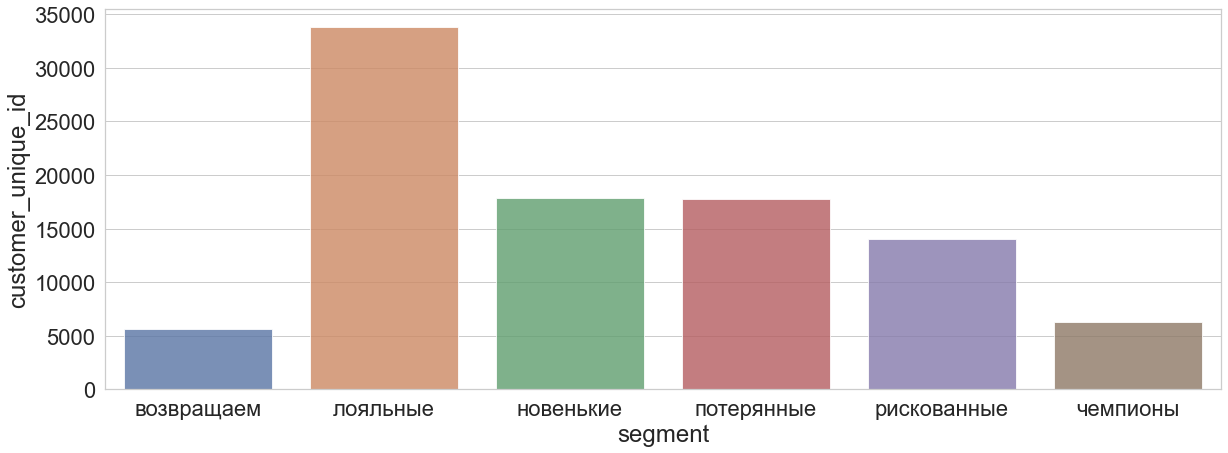

In [452]:
# figure size
sns.set(font_scale = 2,
        style      = "whitegrid",
        rc         = {'figure.figsize': (20, 7)}
       )

sns.barplot(df_rfm.segment, df_rfm.customer_unique_id, alpha=0.8)

In [ ]:
# Вывод: лояльных клиентов много. Но необохдимо работать как и над потерянными, так и над рискованными
#        это даст допольнительный приток клиентов и прибыли для компании